In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('insurance.csv')

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df['sex'] = df['sex'].astype('category')
df['sex'] =df['sex'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] =df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] =df['region'].cat.codes

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


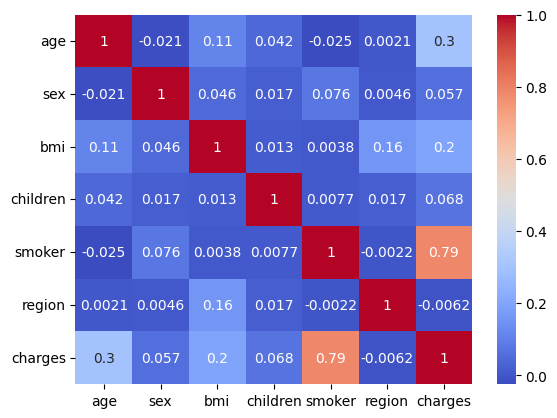

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

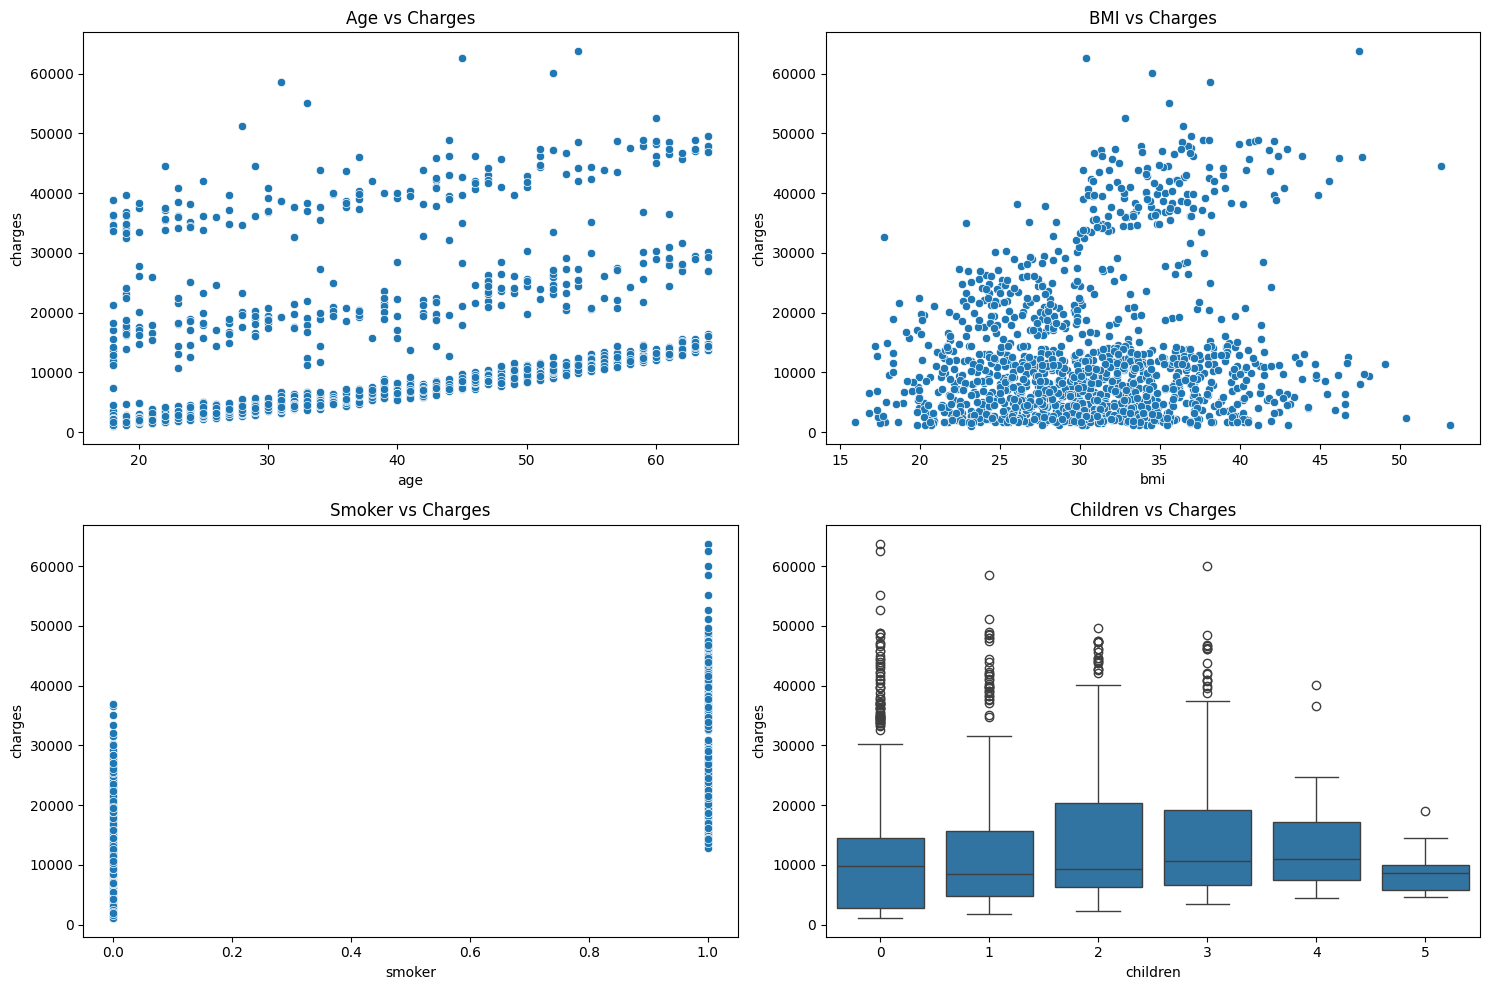

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot 1
plt.subplot(221)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

# Plot 2
plt.subplot(222)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

# Plot 3
plt.subplot(223)
sns.scatterplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')

# Plot 4
plt.subplot(224)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Membuat model DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)

# Melatih model
clusters = dbscan.fit_predict(df)
df_clean = df[clusters != -1]

In [ ]:
X = df_clean[['age', 'bmi', 'smoker', 'children']]
y = df_clean['charges']  # Target

In [ ]:
X

,age,bmi,smoker,children
1,18,33.770,0,1
5,31,25.740,0,0
17,23,23.845,0,0
18,56,40.300,0,0
21,30,32.400,0,1
...,...,...,...,...
1299,19,25.745,0,1
1322,62,38.830,0,0
1325,61,33.535,0,0
1334,18,31.920,0,0



2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

3. Feature scaling

In [ ]:
std = StandardScaler()
# Feature Scaling

X = X.values
y = y.values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
c = model.intercept_
print(f'Intercept (c): {c}')

Intercept (c): -3422.3694225550535


In [ ]:
m = model.coef_
print(f'Koefisien slope: {m}')

Koefisien slope: [264.37375184  -3.7172561    0.         205.32980869]


5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_train_pred

array([ 1256.54862215,  1714.59858482,  1469.14099656,  4632.59775628,
       13135.7104885 ,  7789.34019879,  1213.11248465,  1494.04661241,
        5125.82687795,  2569.58889812,  9371.54948697,  8313.18092443,
        2293.11547769,  8820.20106622,  9037.22164533,  1194.47044532,
        9042.05407826,  4535.7679049 ,  7958.91000383,  7419.44288627,
       13098.24054704,  1534.56470387,  1525.27156363,  2289.58408439,
        2567.11692282, 12829.77781349,  1243.12932764,  1188.33697276,
        2823.72160942, 12688.62902307,  1194.06154715, 11777.18958418,
        4593.73384378,  1481.37076912,  1999.85864597,  5933.40825969,
        1241.71677032,  1524.80690662, 13139.94816045,  5908.87436945,
        1416.15618085, 13096.19605619,  1186.98017429,  1224.41294319,
       11781.70605034,  1410.84050463,  8111.90292488,  2286.7217972 ,
        1516.68470204,  6931.02294128,  1473.97342948,  2000.86230511,
       11810.31033601,  8819.84792689,  1190.79036179,  3855.93927531,
      

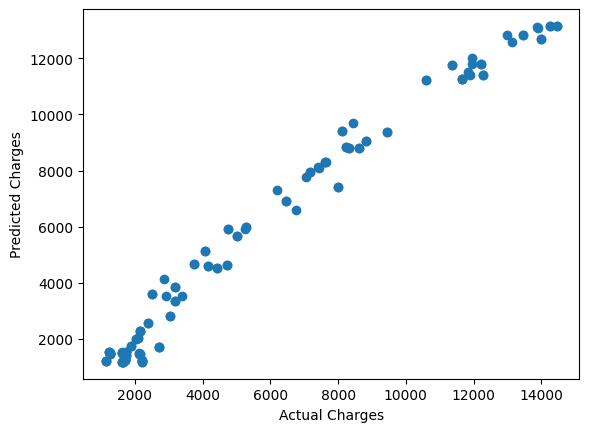

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [ ]:
y_test_pred = model.predict(X_test)

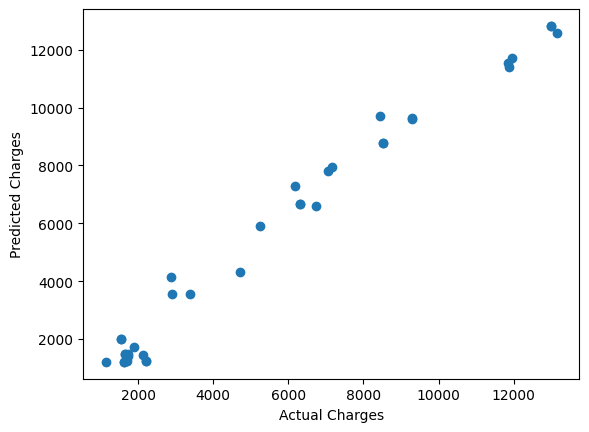

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi

In [ ]:
# Evaluasi pada data training
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Evaluasi pada data testing
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Menampilkan hasil evaluasi untuk data training
print("=== Evaluasi pada Data Train ===")
print(f"R-squared (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"MAE (Train): {mae_train}")

# Menampilkan hasil evaluasi untuk data testing
print("\n=== Evaluasi pada Data Test ===")
print(f"R-squared (Test): {r2_test}")
print(f"MSE (Test): {mse_test}")
print(f"MAE (Test): {mae_test}")

=== Evaluasi pada Data Train ===
R-squared (Train): 0.9768332853189101
MSE (Train): 410771.87636403897
MAE (Train): 526.4703880907721

=== Evaluasi pada Data Test ===
R-squared (Test): 0.9799393023188583
MSE (Test): 320202.7925643144
MAE (Test): 466.92356854005874


In [ ]:
pred_y_df = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : y_pred_test, 'Difference' : y_test - y_pred_test})
pred_y_df[0:25]

,Actual Value,Predicted Value,Difference
111,11881.35800,11418.444040,462.913960
310,8444.47400,9697.439157,-1252.965157
1052,9288.02670,9626.388477,-338.361777
195,1639.56310,1487.020998,152.542102
482,1622.18850,1219.822132,402.366368
100,6186.12700,7299.489110,-1113.362110
889,11945.13270,11727.252918,217.879782
1322,12981.34570,12824.462137,156.883563
807,2136.88225,1464.773221,672.109029
1065,7045.49900,7792.611384,-747.112384
